# Konwolucyjne siecie neuronowe

## Convolution neural networks, CNN

<br>

# Filtry jako ekstraktory informacji

<img src="Grafika/Filter.png" width="550">

<img src="Grafika/OriginalAndFilter.png" width="550">

<img src="Grafika/FirstPixelMulitiplication.png" width="550">

<img src="Grafika/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/

### Filtrowanie - konwolucja (splot):

<img src="Grafika/matrixConvolution.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpga

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="Grafika/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### W przypadku macierzy trójwymiarowych, filtrowanie wygląda tak:

<img src="Grafika/concolution3d.gif" width="550">

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wartości w filtrach.

Czyli sieć sama uczy się tego, co jest istotne w obrazie dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="Grafika/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="Grafika/MaxPool.png" width="550">

Źródło: https://adeshpande3.github.io/assets/MaxPool.png

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce z reguły po każdej warstwie konwolucyjnej daje się max pooling.

### Wielowarstwowa sieć konwolucyjna

Wielowarstwowe sieci konwolucyjne wykorzystują wielokrotne składanie operacji filtrowania i uczą się wykrywać bardzo złożone zależności.



<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


Każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji.

### Uwaga. Filtr dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą liczbie filtrów w poprzedniej warstwie.

<img src="Grafika/conv3D.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

Naturalnie, jeżeli na wejściu mamy obiekt więcej niż dwu-wymiarowy to już pierwsza warstwa używa filtrów, które są kostkami.

## Parametry operacji splot.

### Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="Grafika/Stride1.png" width="600">

Strides = (2,2)

<img src="Grafika/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


Z reguły krok wynosi 1. Natomiast dla dużych obrazów krok większy (2 - większych raczej się nie używa, bo filtry są z reguły 3x3) przyspieszy obliczenia a model może działać tak samo dobrze.


### Rozmiar filtra.

Z reguły 3x3, w wyjątkowych sytuacjach 5x5.

# Przechodzimy do praktyki!

# Obrazki 2D (szare)

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names


In [3]:
X[0]  # wektor - pozniej zamienimy na macierz, bo to jest obraz


array([0.        , 0.        , 0.        , ..., 0.        , 0.00130719,
       0.        ], dtype=float32)

In [4]:
X.shape


(1288, 1850)

In [5]:
np.unique(y, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [6]:
from keras.utils import np_utils

y = np_utils.to_categorical(y)
y


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
n_classes = y.shape[1]


In [8]:
target_names


array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])

# X_train = X_train / 255  # skalowanie
# X_test = X_test / 255


In [10]:
X_train[0].shape


(50, 37, 1)

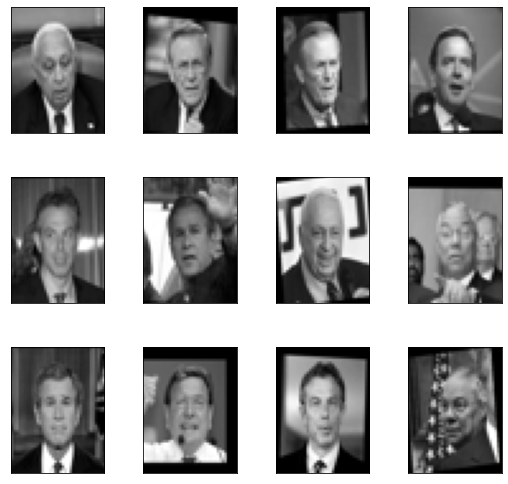

In [11]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:, :, 0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

plt.show()


In [12]:
X_train.shape


(772, 50, 37, 1)

In [13]:
y_train.shape


(772, 7)

In [14]:
X_test.shape


(516, 50, 37, 1)

### Punkt odniesienia

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwowa licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

from keras.layers import Conv2D, MaxPooling2D

from keras.callbacks import EarlyStopping


In [16]:
model = Sequential()
model.add(Flatten(input_shape=(50, 37, 1)))
model.add(Dense(n_classes, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1850)              0         
                                                                 
 dense (Dense)               (None, 7)                 12957     
                                                                 
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________


In [17]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    epochs=100,
    callbacks=[early_stopping],
)

model.evaluate(X_test, y_test)


Epoch 1/100


2022-07-09 13:06:50.644568: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


20/20 [==============================] - 0s 5ms/step - loss: 1.9277 - categorical_accuracy: 0.3874 - val_loss: 1.9083 - val_categorical_accuracy: 0.4581
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8943 - categorical_accuracy: 0.3971 - val_loss: 1.8734 - val_categorical_accuracy: 0.4581
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8643 - categorical_accuracy: 0.3971 - val_loss: 1.8429 - val_categorical_accuracy: 0.4581
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8374 - categorical_accuracy: 0.3971 - val_loss: 1.8168 - val_categorical_accuracy: 0.4581
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 1.8149 - categorical_accuracy: 0.3971 - val_loss: 1.7934 - val_categorical_accuracy: 0.4581
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 1.7957 - categorical_accuracy: 0.3971 - val_loss: 1.7708 - val_categorical_accuracy: 0.4581
Epoch 7/100
20/20 [===

[1.6625880002975464, 0.41472867131233215]

In [18]:
model.evaluate(X_test, y_test)


17/17 [==============================] - 0s 1ms/step - loss: 1.6626 - categorical_accuracy: 0.4147


[1.6625880002975464, 0.41472867131233215]

Z wyciągnięciem modelu z najlepszej epoki:

In [19]:
model = Sequential()
model.add(Flatten(input_shape=(50, 37, 1)))
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=32,
)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1850)              0         
                                                                 
 dense_1 (Dense)             (None, 7)                 12957     
                                                                 
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
19/19 [==============================] - 0s 6ms/step - loss: 1.9289 - categorical_accuracy: 0.3713 - val_loss: 1.9078 - val_categorical_accuracy: 0.4404
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 1.8956 - categorical_accuracy: 0.3990 - val_loss: 1.8762 - val_categorical_accuracy: 0.4404
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 1.8682 - categorical_accuracy: 0.3990 

In [20]:
model.evaluate(X_test, y_test, verbose=0)


[1.6713789701461792, 0.41472867131233215]

### Minimalna sieć konwolucyjna.

Liczba filtrów: 10, wielkość filtra: 3x3.

In [21]:
?Conv2D

In [22]:
?Flatten

In [23]:
model = Sequential()
model.add(Conv2D(10, 3, input_shape=(50, 37, 1), activation="relu"))
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
model.summary()

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)
model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 35, 10)        100       
                                                                 
 flatten_2 (Flatten)         (None, 16800)             0         
                                                                 
 dense_2 (Dense)             (None, 7)                 117607    
                                                                 
Total params: 117,707
Trainable params: 117,707
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
37/37 [==============================] - 0s 8ms/step - loss: 1.7722 - categorical_accuracy: 0.3921 - val_loss: 1.6591 - val_categorical_accuracy: 0.4404
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 1.7151 - categorical_accuracy: 0.3990 - val_loss: 1.6633 - val_categorical

In [24]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 35, 10)        100       
                                                                 
 flatten_2 (Flatten)         (None, 16800)             0         
                                                                 
 dense_2 (Dense)             (None, 7)                 117607    
                                                                 
Total params: 117,707
Trainable params: 117,707
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.evaluate(X_test, y_test, verbose=0)


[1.6778897047042847, 0.41472867131233215]

### Padding "same".

In [26]:
model = Sequential()
model.add(
    Conv2D(10, 5, input_shape=(50, 37, 1), padding="valid", activation="relu")
)
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 46, 33, 10)        260       
                                                                 
 flatten_3 (Flatten)         (None, 15180)             0         
                                                                 
 dense_3 (Dense)             (None, 7)                 106267    
                                                                 
Total params: 106,527
Trainable params: 106,527
Non-trainable params: 0
_________________________________________________________________
None


In [27]:
model = Sequential()
model.add(
    Conv2D(10, 5, input_shape=(50, 37, 1), padding="same", activation="relu")
)
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 50, 37, 10)        260       
                                                                 
 flatten_4 (Flatten)         (None, 18500)             0         
                                                                 
 dense_4 (Dense)             (None, 7)                 129507    
                                                                 
Total params: 129,767
Trainable params: 129,767
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
37/37 [==============================] - 0s 8ms/step - loss: 1.7514 - categorical_accuracy: 0.3903 - val_loss: 1.6857 - val_categorical_accuracy: 0.4404
Epoch 2/100
37/37 [==============================] - 0s 5ms/step - loss: 1.7164 - categorical_accuracy: 0.3990 - val_loss: 1.6635 - val_catego

[1.2543202638626099, 0.5406976938247681]

### Pooling

Przetestuj dodanie warstwy pooling po warstwie konwolucyjnej. Przeanalizuj strukturę sieci.

In [28]:
?MaxPooling2D

In [29]:
model = Sequential()
model.add(
    Conv2D(
        10, (5, 5), input_shape=(50, 37, 1), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 37, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 18, 10)       0         
 )                                                               
                                                                 
 flatten_5 (Flatten)         (None, 4500)              0         
                                                                 
 dense_5 (Dense)             (None, 7)                 31507     
                                                                 
Total params: 31,767
Trainable params: 31,767
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
37/37 [==============================] - 0s 6ms/step - loss: 1.7738 - categorical_accuracy: 0.3938 

[1.6785811185836792, 0.41472867131233215]

In [30]:
model.evaluate(X_test, y_test, verbose=0)


[1.6785811185836792, 0.41472867131233215]

In [31]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 50, 37, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 18, 10)       0         
 )                                                               
                                                                 
 flatten_5 (Flatten)         (None, 4500)              0         
                                                                 
 dense_5 (Dense)             (None, 7)                 31507     
                                                                 
Total params: 31,767
Trainable params: 31,767
Non-trainable params: 0
_________________________________________________________________


Ćwiczenie

Dodaj ukrytą warstwę gęstą miedzy częścią konwoucyjną sieci a warstwą wyjściową i regularyzację dropout na tej warstwie.


In [57]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(
    Conv2D(
        10, (5, 5), input_shape=(50, 37, 1), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(n_classes, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=4,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 50, 37, 10)        260       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 18, 10)       0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 4500)              0         
                                                                 
 dense_41 (Dense)            (None, 7)                 31507     
                                                                 
 dropout_7 (Dropout)         (None, 7)                 0         
                                                                 
 dense_42 (Dense)            (None, 7)                 56        
                                                     

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_27" is incompatible with the layer: expected shape=(None, 50, 37, 1), found shape=(None, 32, 32, 3)


In [58]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(
    Conv2D(
        10, (5, 5), input_shape=(50, 37, 1), padding="same", activation="relu"
    )
)
model.add(Dense(n_classes, activation="tanh", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 50, 37, 10)        260       
                                                                 
 dense_43 (Dense)            (None, 50, 37, 7)         77        
                                                                 
 dropout_8 (Dropout)         (None, 50, 37, 7)         0         
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 18, 7)        0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 3150)              0         
                                                                 
 dense_44 (Dense)            (None, 7)                 22057     
                                                     

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_28" is incompatible with the layer: expected shape=(None, 50, 37, 1), found shape=(None, 32, 32, 3)


### Dwie warstwy konwolucyjne.

Zbuduj dwuwarstwową o 16 filtrach w pierwszej i drugiej warstwie, zawierającej pooling i dropout po każdej warstwie konwolucyjnej, ukrytą warstę gęstą o 32 neuronach i warstwę wyjściową.

<br>

# Case study 2

# Obrazki 3d (kolorowe - RGB)

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ...
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ...
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ...
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ...

 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ...
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ...
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ...
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


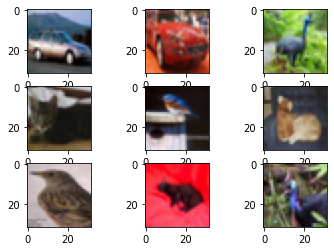

In [50]:
from keras.datasets import cifar10

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = (
    X_train[np.where(y_train < nb_classes)[0]][:n_samples],
    y_train[np.where(y_train < nb_classes)[0]][:n_samples],
)
X_test, y_test = (
    X_test[np.where(y_test < nb_classes)[0]],
    y_test[np.where(y_test < nb_classes)[0]],
)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train, return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i])
# show the plot
plt.show()


In [51]:
y_train


array([[1],
       [1],
       [2],
       ...,
       [3],
       [1],
       [3]], dtype=uint8)

In [52]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

y_train[0:5]

X_train[0].shape


(32, 32, 3)

### Zadanie 1. 

Zbuduj jednowarstwową sieć konwolucyjną z poolingiem i jedną warstwą ukrytą gęstą.

Liczba filtrów: 32; rozmiar filtra: 5x5.

In [75]:
from tensorflow.keras.regularizers import l2

n_classes = 4

model = Sequential()
model.add(
    Conv2D(
        32, (5, 5), input_shape=(32, 32, 3), padding="same", activation="relu"
    )
)

model.add(MaxPooling2D())
model.add(Dense(n_classes, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(n_classes, activation="softmax"))
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dense_71 (Dense)            (None, 16, 16, 4)         132       
                                                                 
 dropout_22 (Dropout)        (None, 16, 16, 4)         0         
                                                                 
 flatten_41 (Flatten)        (None, 1024)              0         
                                                                 
 dense_72 (Dense)            (None, 4)                 4100      
                                                     

[0.650202214717865, 0.7459999918937683]

In [72]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(
    Conv2D(
        32, (5, 5), input_shape=(32, 32, 3), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(nb_classes, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_38 (Flatten)        (None, 8192)              0         
                                                                 
 dense_66 (Dense)            (None, 4)                 32772     
                                                                 
Total params: 35,204
Trainable params: 35,204
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
329/329 [==============================] - 2s 5ms/step - loss: 1.0107 - categorical_accuracy: 0.58

[0.6496098041534424, 0.7557500004768372]

In [76]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(
    Conv2D(
        32, (5, 5), input_shape=(32, 32, 3), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(nb_classes, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 flatten_42 (Flatten)        (None, 8192)              0         
                                                                 
 dense_73 (Dense)            (None, 4)                 32772     
                                                                 
Total params: 35,204
Trainable params: 35,204
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
329/329 [==============================] - 2s 5ms/step - loss: 0.9783 - categorical_accuracy: 0.60

[0.6547030806541443, 0.7480000257492065]

In [68]:
?model.evaluate

### Zadanie 

Zbuduj i przetestuj sieć przestawioną na rysunku:

<img src="Grafika/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [78]:
model = Sequential()
model.add(
    Conv2D(
        6, (5, 5), input_shape=(32, 32, 3), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(
    Conv2D(
        16, (5, 5), input_shape=(32, 32, 3), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dense(84, activation="relu"))
model.add(Dense(nb_classes, activation="softmax"))

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["categorical_accuracy"],
)
print(model.summary())

early_stopping = EarlyStopping(
    patience=3, monitor="val_loss", restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_split=0.25,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,
)

model.evaluate(X_test, y_test, verbose=0)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 16, 16, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 8, 8, 16)         0         
 g2D)                                                            
                                                                 
 flatten_44 (Flatten)        (None, 1024)              0         
                                                                 
 dense_75 (Dense)            (None, 120)             

[0.6266300678253174, 0.7599999904632568]

### Augmentacja obrazów


Przykłady augmentacji obrazów

![](Grafika/augmentation.jpeg)
* Scaling

![](Grafika/rescaling.png)

* Cropping

![](Grafika/cropping-2.png)

* Flipping
  
![](Grafika/flipping.png)


* Brightness, contrast, saturation, hue

![](Grafika/color-augmentation.png)

### Czytanie obrazów z dysku

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
?ImageDataGenerator

In [80]:
import tensorflow as tf


In [103]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

data_generator = datagen.flow_from_directory(
    "./Dane/dogs-vs-cats/",
    target_size=(16, 16),
    batch_size=16,
    class_mode="binary",
)

model = Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam")
model.fit(data_generator)


Found 3336 images belonging to 2 classes.
209/209 [==============================] - 5s 22ms/step - loss: 7.1865


In [82]:
!ls Dane/dogs-vs-cats/train/

cats dogs


### Zadanie
Przetrenuj model do wykrywania czy na obrazie jest kot lub pies, wykorzystując ImageDataGenerator i augmentacje obrazów. Obrazy wczytuj wielkości 32x32 piksele.

In [83]:
from keras.layers import Dense, Flatten, Dropout

from keras.layers import Conv2D, MaxPooling2D


In [84]:
h, w = 32, 32
train_data_dir = "Dane/dogs-vs-cats/train"
validation_data_dir = "Dane/dogs-vs-cats/test"


In [153]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    samplewise_center=True,
    featurewise_std_normalization=True,
    samplewise_std_normalization=True,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1.0/255,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

data_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(h, w),
    batch_size=16,
    class_mode="binary",
)

model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=(h, w, 3), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D())
model.add(tf.keras.layers.Flatten())
model.add(Dense(120, activation="relu", kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
# model.add(Dense(84, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(data_generator)

Found 3192 images belonging to 2 classes.
200/200 [==============================] - 5s 23ms/step - loss: 1.1918 - accuracy: 0.6012


In [158]:
data_generator_train = datagen.flow_from_directory(
    train_data_dir,
    target_size=(h, w),
    batch_size=16,
    class_mode="binary",
)

data_generator_test = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(h, w),
    batch_size=16,
    class_mode="binary",
)

model = Sequential()

model.add(
    Conv2D(
        6, (5, 5), input_shape=(32, 32, 3), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(
    Conv2D(
        16, (5, 5), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(
    Conv2D(
        64, (5, 5), padding="same", activation="relu"
    )
)
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(120, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation="sigmoid"))


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(
    patience=3, monitor="accuracy", restore_best_weights=True
)

model.fit(
    data_generator_train,
    epochs=100,
    callbacks=[early_stopping],
    batch_size=16,)

print(model.summary())
model.evaluate(data_generator_test, verbose=0)

Found 3192 images belonging to 2 classes.
Found 144 images belonging to 2 classes.
Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/preprocessing/image.py:1671: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


200/200 [==============================] - 7s 30ms/step - loss: 0.6703 - accuracy: 0.5874
Epoch 2/100
200/200 [==============================] - 6s 29ms/step - loss: 0.6170 - accuracy: 0.6482
Epoch 3/100
200/200 [==============================] - 5s 27ms/step - loss: 0.5694 - accuracy: 0.6974
Epoch 4/100
200/200 [==============================] - 5s 23ms/step - loss: 0.5085 - accuracy: 0.7491
Epoch 5/100
200/200 [==============================] - 5s 24ms/step - loss: 0.4353 - accuracy: 0.7964
Epoch 6/100
200/200 [==============================] - 5s 24ms/step - loss: 0.3449 - accuracy: 0.8468
Epoch 7/100
200/200 [==============================] - 5s 26ms/step - loss: 0.2414 - accuracy: 0.9026
Epoch 8/100
200/200 [==============================] - 4s 21ms/step - loss: 0.1572 - accuracy: 0.9417
Epoch 9/100
200/200 [==============================] - 4s 21ms/step - loss: 0.1182 - accuracy: 0.9552
Epoch 10/100
200/200 [==============================] - 4s 19ms/step - loss: 0.0795 - accuracy

[2.0667800903320312, 0.6875]

In [85]:
model.summary()


Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_45 (Flatten)        (None, None)              0         
                                                                 
 dense_78 (Dense)            (None, 1)                 769       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


### Transfer learning

<img src="Grafika/TransferLearning_1.png" width="600">

Źródło: https://medium.com/@14prakash/transfer-learning-using-keras-d804b2e04ef8

<br>

<br>


<br>


<img src="Grafika/TransferLearning_2.png" width="600">

Źródło: https://medium.com/decathlondevelopers/how-you-can-build-an-image-classifier-in-one-day-part-1-transfer-learning-5602d3f96e6b


In [159]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np


In [160]:
h, w = 32, 32
base_model = VGG16(
    weights="imagenet", include_top=False, input_shape=(h, w, 3)
)


58889256/58889256 [==============================] - 10s 0us/step


In [161]:
base_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout


In [163]:
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(128, activation="relu"))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation="sigmoid"))


In [164]:
new_model = Sequential()
new_model.add(base_model)
new_model.add(top_model)


In [165]:
new_model.summary()


Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 sequential_77 (Sequential)  (None, 1)                 65793     
                                                                 
Total params: 14,780,481
Trainable params: 14,780,481
Non-trainable params: 0
_________________________________________________________________


In [166]:
new_model.layers


In [167]:
new_model.layers[0].trainable = False
#


In [168]:
new_model.compile(
    loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]
)


In [169]:
new_model.summary()


Model: "sequential_78"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 sequential_77 (Sequential)  (None, 1)                 65793     
                                                                 
Total params: 14,780,481
Trainable params: 65,793
Non-trainable params: 14,714,688
_________________________________________________________________


In [171]:
early_stopping = EarlyStopping(
    patience=2, monitor="loss", restore_best_weights=True
)
new_model.fit(
    train_datagen,
    callbacks=[early_stopping],
    batch_size=32,
    epochs=30,
    validation_data=test_datagen,
)
new_model.evaluate(test_datagen, verbose=0)


NameError: name 'train_datagen' is not defined

[Wszystkie dostępne przetrenowane modele w Kerasie](https://keras.io/api/applications/)